## **Session 06 / 30-Oct-2025**

## ***Importing core libraries: `Numpy` (numerical ops), `Pandas` (data structures), `Matplotlib` (plotting), and key `Scikit-Lrarn` modules for classification, data splitting, feature scaling, and model evaluation metrics.***

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification, load_breast_cancer, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

## ***Exercise 1: Predicting Customer Churn for a telecommunications and internet service provider company.***

### ***Step 1: Dataset Generation and Preparation. We define a synthetic dataset using `make_classification()`, convert the resulting NumPy arrays into a Pandas `DataFrame()`, and assign meaningful column names.***

In [44]:
x, y = make_classification(
        n_samples = 1000,
        n_features = 5,
        n_informative = 3,
        n_redundant = 0,
        n_classes = 2,
        random_state = 42,
        weights = [0.7, 0.3]
    )

In [45]:
feature_names = ["Tenure", "MonthlyCharges", "ContractType", "SupportCalls", "InternetService"]
df = pd.DataFrame(data=x, columns=feature_names)
df["Churn"] = y
print(df.head())
print(df["Churn"].value_counts())

     Tenure  MonthlyCharges  ContractType  SupportCalls  InternetService  \
0 -0.529332       -0.093387     -1.526572      0.406847        -0.619699   
1 -0.978500       -1.690672      1.229308     -0.703071         0.202055   
2 -2.171571        0.545787     -0.244730     -0.129407        -1.474666   
3 -0.151299       -0.365506      1.335714      0.038355        -0.005317   
4 -0.777371        1.146030     -2.479343      0.297014         1.518522   

   Churn  
0      0  
1      1  
2      0  
3      1  
4      0  
Churn
0    697
1    303
Name: count, dtype: int64


### ***Step 2: Data Splitting, Model Training, and Prediction. We split the data into training and testing sets using `train_test_split()`, initialize and train the `Logistic Regression()` model on the training data, and then generate predictions on the test set.***

In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    df[feature_names],
    df["Churn"],
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [47]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
y_pred = model.predict(x_test)

### ***Step 3: Model Evaluation (Accuracy and Recall). We evaluate the model's performance by calculating key metrics such as Accuracy and Recall using sklearn.metrics.***

In [49]:
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(f"Accuracy = {Accuracy} \nRecall = {Recall:.2f}")

Accuracy = 0.93 
Recall = 0.85


### ***Step 4: Plotting the Results (Alternative: Metrics Comparison). The code below compares and displays the model's Accuracy and Recall as a simple bar plot for visual comparison.***

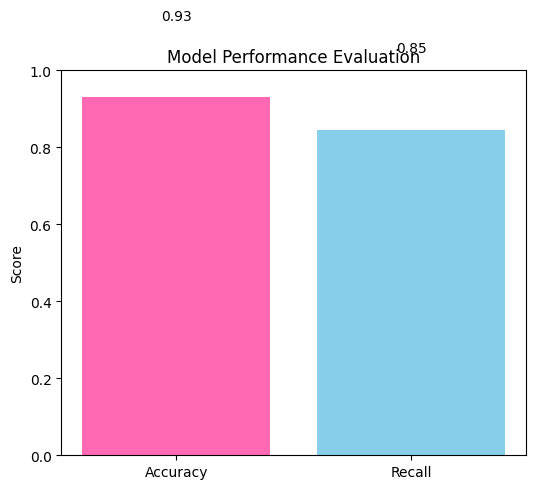

In [50]:
metrics = ["Accuracy", "Recall"]
values = [Accuracy, Recall]
plt.figure(figsize=(6,5))
plt.bar(metrics, values, color=["hotpink", "skyblue"])
for i, v in enumerate(values):
    plt.text(i, v + 0.2, f"{v:.2f}", ha="center", color="black")
plt.ylim(0,1)
plt.title("Model Performance Evaluation")
plt.ylabel("Score")
plt.show()

## ***Exercise 2: Employee Churn Prediction. Predicting job attrition among a company's employees.***

### ***We follow the same steps to solve this problem as we did for Exercise 1.***

### ***Dataset Generation: We use `make_classification` to generate synthetic data with 7 features and imbalanced classes (80% stay, 20% churn).***

In [51]:
a, b = make_classification(
        n_samples = 500,
        n_features = 7,
        n_informative = 3,
        n_redundant = 0,
        n_classes = 2,
        random_state = 42,
        weights = [0.8, 0.2]
    )

### ***Data Preparation: Converting the NumPy arrays into a Pandas DataFrame and defining relevant columns related to attrition factors (Salary, Time, Benefit, etc.).***

In [52]:
names = ["Salary", "Time", "Benefit", "Insurance", "Grade", "Award", "Furlough"]
df = pd.DataFrame(data=a, columns=names)
df["Churn"] = b
print(df.head())
print(df["Churn"].value_counts())

     Salary      Time   Benefit  Insurance     Grade     Award  Furlough  \
0  0.001143 -0.543748  0.464851  -0.259547  0.513106  0.709452 -0.435486   
1 -1.199351 -0.779526 -0.951190   0.419610 -0.094459 -1.817979  0.759712   
2 -1.665753 -0.711819 -0.900903  -0.463161  1.200262 -0.451159  0.551741   
3  1.805970 -0.669077 -1.658650  -1.438278  0.113270 -0.426358  1.148446   
4  0.792810 -0.489040 -0.394992  -0.333819  0.696954  0.560919 -0.295480   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  
Churn
0    397
1    103
Name: count, dtype: int64


### ***Data Splitting: Splitting the data into training and testing sets using train_test_split and the stratify parameter to maintain the class proportions.***

In [53]:
x_train, x_test, y_train, y_test = train_test_split(
    df[names],
    df["Churn"],
    test_size=0.3,
    random_state=42,
    stratify=b
)

### ***Training and Prediction: Defining and training the Logistic Regression model, then generating predictions (y_pred) on the test data.***

In [54]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
y_pred = model.predict(x_test)

### ***Model Evaluation: Calculating and displaying key evaluation metrics: Accuracy and Recall.***

In [56]:
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(f"Accuracy = {Accuracy:.2f} \nRecall = {Recall:.2f}")

Accuracy = 0.93 
Recall = 0.74


### ***To visualize and compare the model's performance, we plot a bar graph showing Accuracy and Recall.***

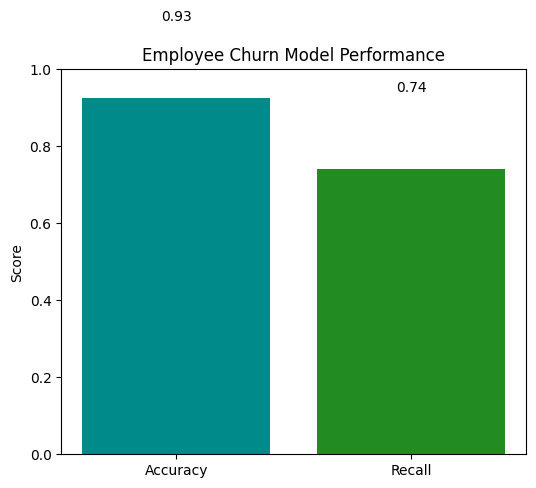

In [57]:
metrics = ["Accuracy", "Recall"]
values = [Accuracy, Recall]
plt.figure(figsize=(6,5))
plt.bar(metrics, values, color=["darkcyan", "forestgreen"])
for i, v in enumerate(values):
    plt.text(i, v + 0.2, f"{v:.2f}", ha="center", color="black")
plt.ylim(0,1)
plt.title("Employee Churn Model Performance")
plt.ylabel("Score")
plt.show()

## ***Exercise 3:***

### ***Dataset Loading: We load the real-world Breast Cancer dataset from `sklearn.datasets`. This is a binary classification problem (Malignant vs. Benign).***

In [58]:
data = load_breast_cancer()
x = data.data
y = data.target

### ***Data Splitting: We split the data into training and testing sets, allocating 30% of the data for testing purposes.***

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### ***Feature Scaling: We use `StandardScaler` to standardize the features (inputs) so they have a mean of zero and unit variance. This step is critical for optimizing the performance of distance-based models like Logistic Regression.***

In [60]:
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train)
x_test_scalled = scaler.transform(x_test)

### ***Model Training: We fit the Logistic Regression model on the standardized training data.***

In [61]:
model = LogisticRegression(random_state=42)
model.fit(x_train_scalled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### ***Prediction and Evaluation: We generate predictions on the scaled test data and then calculate the key evaluation metrics: Accuracy and Recall.***

In [62]:
y_pred = model.predict(x_test_scalled)
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(f"Accuracy = {Accuracy:.2f} \nRecall = {Recall:.2f}")

Accuracy = 0.98 
Recall = 0.98


### ***Correct Plotting Step (Metrics Comparison)***

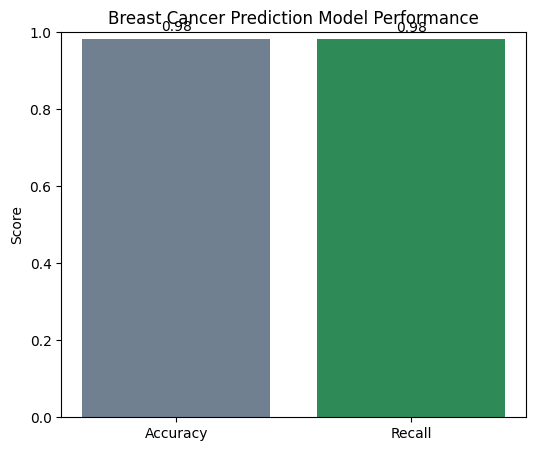

In [63]:
metrics = ['Accuracy', 'Recall']
values = [Accuracy, Recall]
plt.figure(figsize=(6, 5))
plt.bar(metrics, values, color=['slategrey', 'seagreen'])
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', color='black')
plt.ylim(0, 1)
plt.title('Breast Cancer Prediction Model Performance')
plt.ylabel('Score')
plt.show()

## ***Practice 4: Disease Risk Prediction; Predicting whether an individual is at risk for a specific disease based on their Age and Physical Activity Level, using a Decision Tree and Binary Classification.***

### ***Data Generation: Defining the dataset by generating synthetic data for Age and Activity and creating a binary Target variable (Risk/No Risk).***

In [64]:
np.random.seed(42)
n_samples = 100
age = np.random.uniform(20, 80, n_samples)
activity = np.random.uniform(-1, 1, n_samples)

In [65]:
x= (age / 80) + (1-(activity+1) / 2)
target = x > np.median(x)
data = pd.DataFrame({"Age": age,
                     "Activity": activity,
                     "Target": target})
data

,Age,Activity,Target
0,42.472407,-0.937142,True
1,77.042858,0.272821,True
2,63.919637,-0.371288,True
3,55.919509,0.017141,True
4,29.361118,0.815133,False
...,...,...,...
95,49.627736,-0.301581,True
96,51.363970,0.451911,False
97,45.652461,0.794221,False
98,21.525148,0.774173,False


### ***Decision Tree: Splitting the data and training the Decision Tree Classifier, limiting the complexity to a maximum depth of 3 (`max_depth=3`).***

In [66]:
x = data[["Age", "Activity"]]
y = data["Target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [67]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### ***Evaluation: Predicting outcomes and calculating the Accuracy and Recall for the Decision Tree model.***

In [68]:
y_pred = model.predict(x_test)
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(f"Accuracy = {Accuracy:.2f} \nRecall = {Recall:.2f}")

Accuracy = 0.80 
Recall = 0.71


### ***Logistic Regression: Training the Logistic Regression model using the same training data.***

In [69]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### ***Evaluation: Predicting outcomes and calculating the Accuracy and Recall for the Logistic Regression model.***

In [70]:
y_pred = model.predict(x_test)
Accuracy = accuracy_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
print(f"Accuracy = {Accuracy:.2f} \nRecall = {Recall:.2f}")

Accuracy = 0.93 
Recall = 0.88


## ***Conclusion and Model Comparison: In comparing the performance of the Decision Tree and Logistic Regression models on this specific dataset, the Logistic Regression model demonstrated superior performance:*** 
### ***- Accuracy: Logistic Regression achieved a higher accuracy of 0.93, compared to 0.80 for the Decision Tree.***
### ***- Recall: With a score of 0.88 compared to 0.71, Logistic Regression was significantly stronger at correctly identifying positive cases (individuals truly at risk).***
## ***Final Decision: Given that our synthetic data likely had a relatively linear decision boundary and the primary goal is maximizing predictive accuracy, the Logistic Regression model is selected as the most suitable model for predicting disease risk in this scenario.***

## ***Homework: Carrying out all stages of review, modeling, and evaluation on the `IRIS` dataset.***

In [71]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [72]:
iris = pd.DataFrame(
    data = np.c_[iris["data"], iris["target"]],
    columns = iris["feature_names"] + ["target"]
    )

In [73]:
iris.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0


In [74]:
species = []
for i in range(len(iris["target"])):
    if iris["target"][i] == 0:
        species.append("setosa")
    elif iris["target"][i] == 1:
        species.append("versicolor")
    else:
        species.append("verginica")
iris["species"] = species

In [75]:
iris.groupby("species").size()

species
setosa        50
verginica     50
versicolor    50
dtype: int64

In [76]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


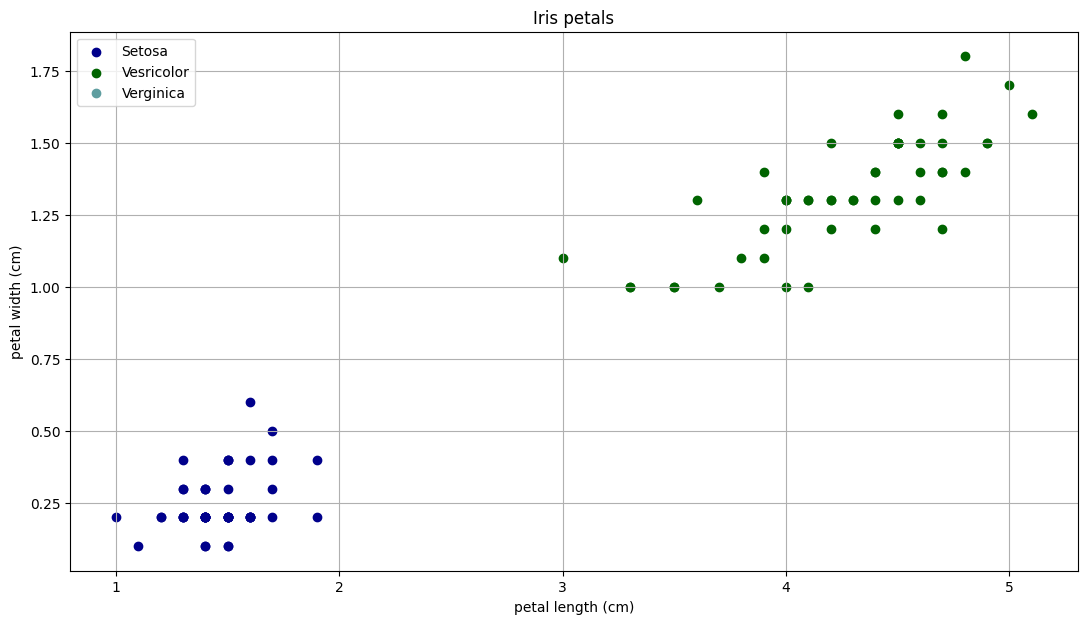

In [77]:
setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species == "versicolor"]
verginica = iris[iris.species == "virginica"]
fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot
# lables and scatter points
ax.scatter(setosa["petal length (cm)"], setosa["petal width (cm)"], label="Setosa", facecolor="darkblue")
ax.scatter(versicolor["petal length (cm)"], versicolor["petal width (cm)"], label="Vesricolor", facecolor="darkgreen")
ax.scatter(verginica["petal length (cm)"], verginica["petal width (cm)"], label="Verginica", facecolor="cadetblue")
ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [78]:
x = iris.drop(["target", "species"], axis=1)
x = x.to_numpy()[:, (2,3)]
y = iris["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [79]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [80]:
training_prediction = model.predict(x_train)
training_prediction

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

In [81]:
test_prediction = model.predict(x_test)
test_prediction

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2., 1., 2., 1.,
       2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 1., 2.,
       0., 1., 2., 0., 2., 2., 1.])

In [82]:
print("Precision, Recall, in training\n")
print(classification_report(y_train, training_prediction, digits=3))

Precision, Recall, in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75



In [83]:
print("Precision, Recall, in testing\n")
print(classification_report(y_test, test_prediction, digits=3))

Precision, Recall, in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

